# Installing dependencies

In [57]:
pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [58]:
!git clone https://github.com/ultralytics/yolov5
    


fatal: destination path 'yolov5' already exists and is not an empty directory.


In [59]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


# Importing libraries

In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

## Importing Yolo model from pytorch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

### Model view

In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

### Setting up directories

In [7]:
img = '/Users/samarpan/Documents/GitHub/Drowsiness_Detection_YOLO/images/tester.jpg'

In [8]:

plt.figure(figsize=(15,10))
image = plt.imread(img)
plt.imshow(image)

In [9]:
results = model(img)
results.print()

image 1/1: 1021x1532 5 persons, 15 cars, 4 buss, 5 trucks, 3 traffic lights
Speed: 22.4ms pre-process, 265.9ms inference, 13.4ms NMS per image at shape (1, 3, 448, 640)


#### Testing the Yolo model

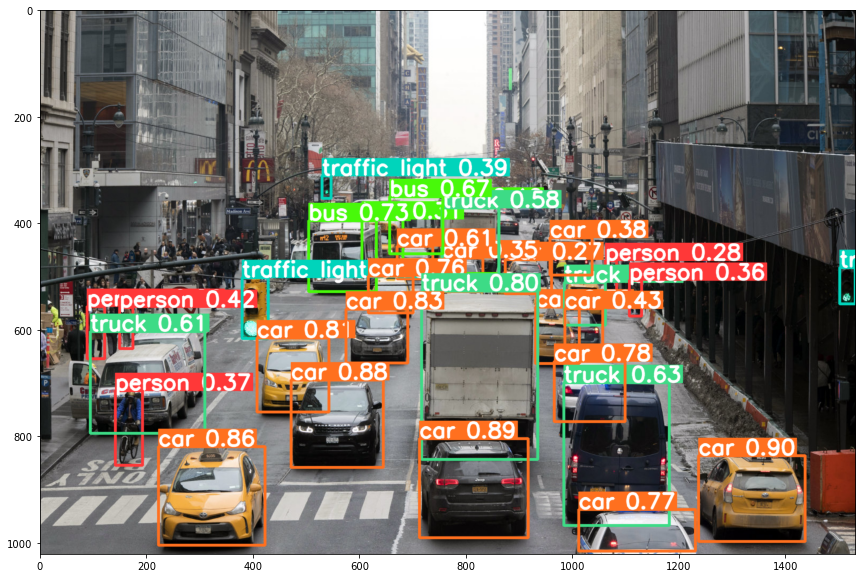

In [10]:
%matplotlib inline 
plt.figure(figsize=(15,10))
plt.imshow(np.squeeze(results.render()))

plt.show()

In [11]:
results.xyxy

[tensor([[1.23615e+03, 8.36395e+02, 1.43633e+03, 9.97456e+02, 9.03800e-01, 2.00000e+00],
         [7.12554e+02, 8.04366e+02, 9.16554e+02, 9.90495e+02, 8.89779e-01, 2.00000e+00],
         [4.71484e+02, 6.94344e+02, 6.44111e+02, 8.58875e+02, 8.84194e-01, 2.00000e+00],
         [2.22496e+02, 8.19539e+02, 4.22701e+02, 1.00462e+03, 8.62561e-01, 2.00000e+00],
         [5.74958e+02, 5.61332e+02, 6.90501e+02, 6.62630e+02, 8.30696e-01, 2.00000e+00],
         [4.07556e+02, 6.15674e+02, 5.42867e+02, 7.54283e+02, 8.07446e-01, 2.00000e+00],
         [7.16141e+02, 5.27542e+02, 9.34188e+02, 8.43311e+02, 7.99769e-01, 7.00000e+00],
         [9.65977e+02, 6.59502e+02, 1.09834e+03, 7.72888e+02, 7.82973e-01, 2.00000e+00],
         [1.01127e+03, 9.37813e+02, 1.23063e+03, 1.01557e+03, 7.72787e-01, 2.00000e+00],
         [6.16932e+02, 4.99633e+02, 7.00980e+02, 5.68278e+02, 7.61454e-01, 2.00000e+00],
         [3.79333e+02, 5.02917e+02, 4.28460e+02, 6.16982e+02, 7.32326e-01, 9.00000e+00],
         [5.04055e+02

In [12]:
results.render()

[array([[[161, 157, 148],
         [152, 148, 139],
         [162, 158, 149],
         ...,
         [ 18,  18,  18],
         [ 12,  12,  12],
         [ 13,  13,  13]],
 
        [[159, 155, 146],
         [151, 147, 138],
         [161, 157, 148],
         ...,
         [ 19,  19,  19],
         [ 14,  14,  14],
         [ 14,  14,  14]],
 
        [[157, 153, 144],
         [149, 145, 136],
         [160, 156, 147],
         ...,
         [ 18,  18,  18],
         [ 14,  14,  14],
         [ 15,  15,  15]],
 
        ...,
 
        [[102, 103, 105],
         [102, 103, 105],
         [104, 105, 107],
         ...,
         [166, 161, 155],
         [180, 177, 172],
         [174, 173, 169]],
 
        [[102, 103, 105],
         [103, 104, 106],
         [104, 105, 107],
         ...,
         [145, 142, 137],
         [160, 159, 154],
         [179, 178, 174]],
 
        [[104, 104, 104],
         [105, 105, 105],
         [106, 106, 106],
         ...,
         [154, 153, 149],
  

#### Model code for Live object detection from webcam

In [13]:
''''
# for live object detection
cap = cv2.VideoCapture(0) # for video put path of video here
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'): 
        break
cap.release()
cv2.destroyAllWindows()
''''''

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-13-85a06b40b0a4>, line 16)

#### Model code for object detection from video feed

In [ ]:
'''
# for video object detection
cap = cv2.VideoCapture('data/yoloVidTest.mp4') # for video put path of video here
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'): 
        break
cap.release()
cv2.destroyAllWindows()

## Building Custom Model 

In [14]:
import uuid   # Unique identifier
import os
import time

## Setting up folders
### for images captured for trainign custom yolo model

In [15]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 25

In [16]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data/images/awake.78343610-56e0-11ed-a458-6e398c2a0c80.jpg


### Code used for capturing images used for training the model

In [60]:
'''
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
            
cap.release()
cv2.destroyAllWindows()

'''

"\ncap = cv2.VideoCapture(0)\n# Loop through labels\nfor label in labels:\n    print('Collecting images for {}'.format(label))\n    time.sleep(5)\n    \n    # Loop through image range\n    for img_num in range(number_imgs):\n        print('Collecting images for {}, image number {}'.format(label, img_num))\n        \n        # Webcam feed\n        ret, frame = cap.read()\n        \n        # Naming out image path\n        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')\n        \n        # Writes out image to file \n        cv2.imwrite(imgname, frame)\n        \n        # Render to the screen\n        cv2.imshow('Image Collection', frame)\n        \n        # 2 second delay between captures\n        time.sleep(2)\n        \n        if cv2.waitKey(10) & 0xFF == ord('q'):\n            break\n            \n            \ncap.release()\ncv2.destroyAllWindows()\n\n"

In [61]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data/images/awake.1bd15f6c-56e3-11ed-a458-6e398c2a0c80.jpg


#### code for labelling the images

In [62]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data/images/awake.29a47afc-56e3-11ed-a458-6e398c2a0c80.jpg
data/images/awake.29a48236-56e3-11ed-a458-6e398c2a0c80.jpg
data/images/awake.29a48628-56e3-11ed-a458-6e398c2a0c80.jpg
data/images/awake.29a489e8-56e3-11ed-a458-6e398c2a0c80.jpg
data/images/awake.29a48db2-56e3-11ed-a458-6e398c2a0c80.jpg
data/images/awake.29a4917c-56e3-11ed-a458-6e398c2a0c80.jpg
data/images/awake.29a49532-56e3-11ed-a458-6e398c2a0c80.jpg
data/images/awake.29a498de-56e3-11ed-a458-6e398c2a0c80.jpg
data/images/awake.29a49c8a-56e3-11ed-a458-6e398c2a0c80.jpg
data/images/awake.29a4a19e-56e3-11ed-a458-6e398c2a0c80.jpg
data/images/awake.29a4a838-56e3-11ed-a458-6e398c2a0c80.jpg
data/images/awake.29a4ac52-56e3-11ed-a458-6e398c2a0c80.jpg
data/images/awake.29a4b030-56e3-11ed-a458-6e398c2a0c80.jpg
data/images/awake.29a4b40e-56e3-11ed-a458-6e398c2a0c80.jpg
data/images/awake.29a4b7e2-56e3-11ed-a458-6e398c2a0c80.jpg
data/images/awake.29a4bba2-56e3-11ed-a458-6e398c2a0c80.jpg
data/images/awake.29a4bf58-56e3-11ed-a458-6e398c2a0c80.j

### Importing the labelimg library

In [65]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [66]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [67]:
!pip3 install pyqt5 lxml

In [68]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

### Training the custom model using the images captured. 

#### Configuration : 
* 50 images [25 for each set]
* epochs : 600
* batch size : 16

In [69]:
'''
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 600 --data dataset.yml --weights yolov5s.pt --workers 2
'''

'\n!cd yolov5 && python train.py --img 320 --batch 16 --epochs 600 --data dataset.yml --weights yolov5s.pt --workers 2\n'

### Preparing the model to predict images using the weights derived from the training procedure.

In [70]:
#/Users/samarpan/Documents/GitHub/Drowsiness_Detection_YOLO/Code/yolov5/runs/train/exp7/weights/last.pt
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp7/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/samarpan/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-10-28 Python-3.8.8 torch-1.12.1 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


### Using 2 test images for analyse performance

In [71]:
img1 = os.path.join('data', 'images', 'awake.40fe5c80-3e4d-11ed-9935-6e398c2a0c80.jpg')
img2 = os.path.join('data', 'images', 'drowsy.64811030-3e4d-11ed-9935-6e398c2a0c80.jpg')

In [72]:
#awake.2cfa9a00-3e4d-11ed-9935-6e398c2a0c80

In [49]:
results1 = model(img1)

In [50]:
print(img1)

data/images/awake.40fe5c80-3e4d-11ed-9935-6e398c2a0c80.jpg


In [51]:
results1.print()

image 1/1: 720x1280 1 awake
Speed: 32.4ms pre-process, 168.7ms inference, 0.5ms NMS per image at shape (1, 3, 384, 640)


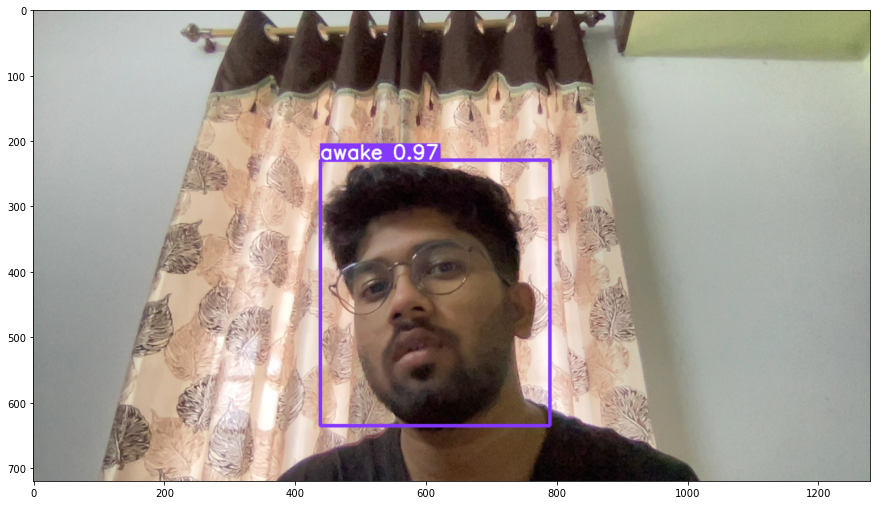

In [52]:
%matplotlib inline 
plt.figure(figsize=(15,10))
plt.imshow(np.squeeze(results1.render()))
plt.show()

In [53]:
results2 = model(img2)
results2.print()

image 1/1: 720x1280 1 drowsy
Speed: 30.8ms pre-process, 177.9ms inference, 2.1ms NMS per image at shape (1, 3, 384, 640)


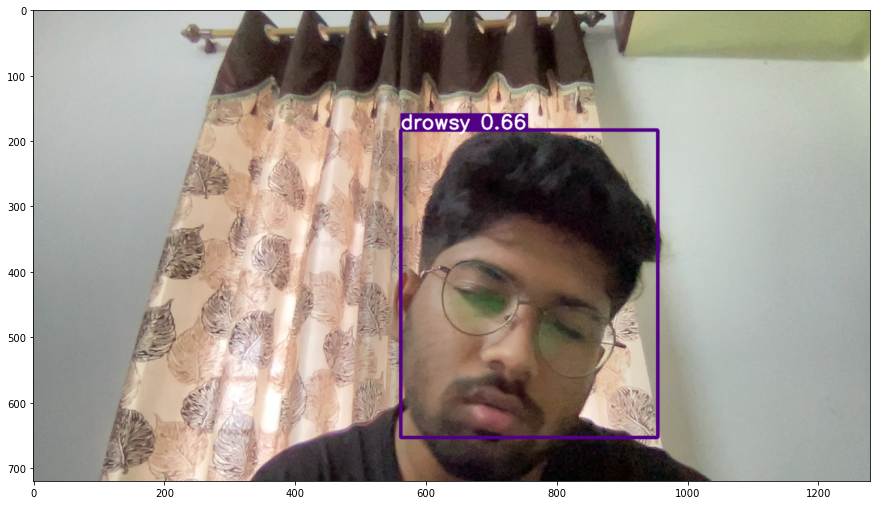

In [54]:
%matplotlib inline 
plt.figure(figsize=(15,10))
plt.imshow(np.squeeze(results2.render()))
plt.show()

In [ ]:
'''
cap = cv2.VideoCapture(0) # for video put path of video here
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'): 
        break
cap.release()
cv2.destroyAllWindows()

In [55]:
imgPath = os.path.join('data', 'testerImgs', '3fbecb20-3e4d-11ed-9935-6e398c2a0c80.jpg')

image 1/1: 720x1280 1 awake
Speed: 29.6ms pre-process, 189.5ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


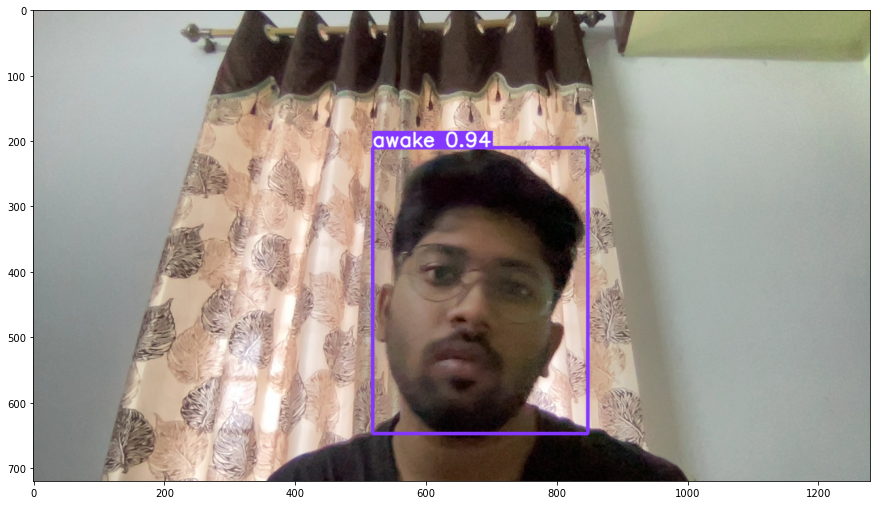

In [56]:
results = model(imgPath)
results.print()

%matplotlib inline 
plt.figure(figsize=(15,10))
plt.imshow(np.squeeze(results.render()))
plt.show()